In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset'

/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/kaggle"

In [ ]:
!kaggle datasets download -d dataclusterlabs/indian-vehicle-dataset

100% 2.36G/2.37G [00:33<00:00, 85.2MB/s]
100% 2.37G/2.37G [00:34<00:00, 74.8MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  indian-vehicle-dataset.zip
  inflating: Auto/Datacluster Auto (1).jpg  
  inflating: Auto/Datacluster Auto (10).jpg  
  inflating: Auto/Datacluster Auto (100).jpg  
  inflating: Auto/Datacluster Auto (101).jpg  
  inflating: Auto/Datacluster Auto (102).jpg  
  inflating: Auto/Datacluster Auto (103).jpg  
  inflating: Auto/Datacluster Auto (104).jpg  
  inflating: Auto/Datacluster Auto (105).jpg  
  inflating: Auto/Datacluster Auto (106).jpg  
  inflating: Auto/Datacluster Auto (107).jpg  
  inflating: Auto/Datacluster Auto (108).jpg  
  inflating: Auto/Datacluster Auto (109).jpg  
  inflating: Auto/Datacluster Auto (11).jpg  
  inflating: Auto/Datacluster Auto (110).jpg  
  inflating: Auto/Datacluster Auto (111).jpg  
  inflating: Auto/Datacluster Auto (112).jpg  
  inflating: Auto/Datacluster Auto (113).jpg  
  inflating: Auto/Datacluster Auto (114).jpg  
  inflating: Auto/Datacluster Auto (115).jpg  
  inflating: Auto/Datacluster Auto (116).jpg  
  inflating: Auto/Dataclust

In [3]:
import tensorflow as tf
import os
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.7.0
Is using GPU? False


In [4]:
data_root = ("/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset")

In [5]:
IMAGE_SHAPE = (224, 224) # (height, width) in no. of pixels

In [6]:
TRAINING_DATA_DIR = str(data_root)

In [7]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(
                  TRAINING_DATA_DIR,
                  subset="validation",
                  shuffle=True,
                  target_size=IMAGE_SHAPE
                  )

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
                  TRAINING_DATA_DIR,
                  subset="training",
                  shuffle=True,
                  target_size=IMAGE_SHAPE)

Found 146 images belonging to 6 classes.
Found 598 images belonging to 6 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 6))

In [ ]:
class_name = train_generator.class_indices
class_names = train_generator.classes
print(class_names)
print(class_name)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Auto' 'Bus' 'Tempo Traveller' 'Tractor' 'Truck' 'Models']


In [ ]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)
!cat labels.txt

Auto
Bus
Tempo Traveller
Tractor
Truck
models

# Model creation

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu',padding= 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(224,224,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(7, activation='softmax')) 
    
    model.compile(loss= 'categorical_crossentropy', optimizer  = 'adam', metrics= ['accuracy'])
    return model

model =  create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_21 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 111, 111, 64)     

In [ ]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs=10,
                    batch_size=128,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                             tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                               save_best_only=True, save_weights_only=False,
                                                               monitor='val_accuracy') ])

Epoch 1/10
19/19 [==============================] - 362s 19s/step - loss: 3.1689 - accuracy: 0.2492 - val_loss: 2.1921 - val_accuracy: 0.1781
Epoch 2/10
19/19 [==============================] - 348s 18s/step - loss: 2.0813 - accuracy: 0.2759 - val_loss: 2.5719 - val_accuracy: 0.2055
Epoch 3/10
19/19 [==============================] - 348s 18s/step - loss: 1.7629 - accuracy: 0.2776 - val_loss: 3.3207 - val_accuracy: 0.1644
Epoch 4/10
19/19 [==============================] - 352s 18s/step - loss: 1.5892 - accuracy: 0.3060 - val_loss: 1.7104 - val_accuracy: 0.1644
Epoch 5/10
19/19 [==============================] - 344s 18s/step - loss: 1.4545 - accuracy: 0.3712 - val_loss: 1.7466 - val_accuracy: 0.1918


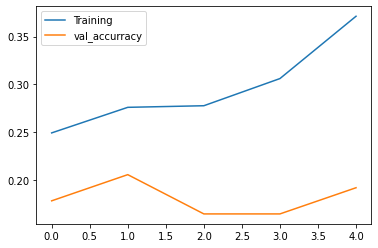

In [ ]:
accuracy = history.history['accuracy']
val_accurracy = history.history['val_accuracy']

plt.plot(range(len(accuracy)), accuracy, label='Training')
plt.plot(range(len(accuracy)), val_accurracy, label='val_accurracy')
plt.legend()
plt.show()

In [ ]:
cd ..

/content/gdrive/MyDrive/Neuralnetworks /MiniPro


In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/model_0.205.h5')

In [ ]:
auto_url = "https://static3.bigstockphoto.com/5/4/9/large2/94577318.jpg"
auto_path = tf.keras.utils.get_file('Auto', origin=auto_url)

img = tf.keras.utils.load_img(
    auto_path, target_size=(224, 224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0 with a 100.00 percent confidence.


# USING THE TRANSFERLEARNING

In [ ]:
!pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
 optimizer=optimizer,
 loss='categorical_crossentropy',
 metrics=['acc'])

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
 train_generator, 
 epochs=20,
 verbose=1,
 steps_per_epoch=steps_per_epoch,
 validation_data=valid_generator,
 validation_steps=val_steps_per_epoch).history

Epoch 1/20
19/19 [==============================] - 356s 18s/step - loss: 1.9182 - acc: 0.2542 - val_loss: 1.3682 - val_acc: 0.3973
Epoch 2/20
19/19 [==============================] - 121s 6s/step - loss: 1.5326 - acc: 0.3779 - val_loss: 1.2050 - val_acc: 0.5479
Epoch 3/20
19/19 [==============================] - 117s 6s/step - loss: 1.3213 - acc: 0.4766 - val_loss: 1.1059 - val_acc: 0.5959
Epoch 4/20
19/19 [==============================] - 117s 6s/step - loss: 1.2081 - acc: 0.5485 - val_loss: 1.0351 - val_acc: 0.6027
Epoch 5/20
19/19 [==============================] - 117s 6s/step - loss: 1.0588 - acc: 0.5853 - val_loss: 0.9876 - val_acc: 0.6370
Epoch 6/20
19/19 [==============================] - 117s 6s/step - loss: 0.9418 - acc: 0.6455 - val_loss: 0.9654 - val_acc: 0.6233
Epoch 7/20
19/19 [==============================] - 119s 6s/step - loss: 0.9369 - acc: 0.6488 - val_loss: 0.9421 - val_acc: 0.6438
Epoch 8/20
19/19 [==============================] - 118s 6s/step - loss: 0.8712 - 

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

5/5 [==============================] - 25s 5s/step - loss: 0.8965 - acc: 0.6644
Final loss: 0.90
Final accuracy: 66.44%


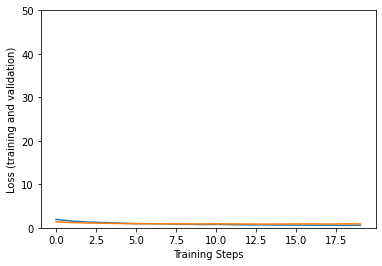

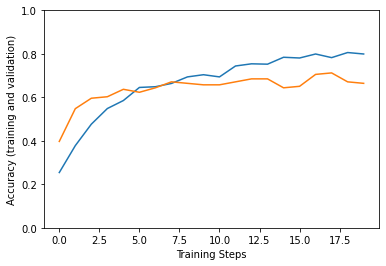

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [ ]:
VEHICLE_SAVED_MODEL = "/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/saved_model"
model.save(VEHICLE_SAVED_MODEL)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/saved_model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/models/saved_model/assets


In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

Prediction results shape: (32, 6)


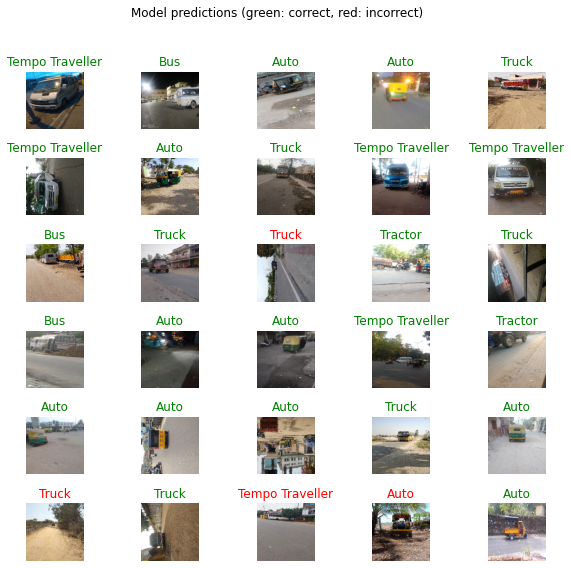

In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

# Reload and test the model

In [ ]:
load_save_model = tf.keras.models.load_model(VEHICLE_SAVED_MODEL)
load_save_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
final_loss, final_accuracy = load_save_model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

5/5 [==============================] - 25s 5s/step - loss: 0.8965 - acc: 0.6644
Final loss: 0.90
Final accuracy: 66.44%


In [ ]:
auto_url = "https://bizimages.withfloats.com/tile/5b61526a46c7460503709287.jpg"
auto_path = tf.keras.utils.get_file('Auto', origin=auto_url)

img = tf.keras.utils.load_img(
    auto_path, target_size=(224, 224)
)

img.show()

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(dataset_labels[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Truck with a 24.07 percent confidence.


In [ ]:
auto_url = "https://i.pinimg.com/564x/68/80/df/6880df8fae92d44bdf849b5eae41831e--modern-india-hold-on.jpg"
auto_path = tf.keras.utils.get_file('Auto', origin=auto_url)

img = tf.keras.utils.load_img(
    auto_path, target_size=(224, 224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(dataset_labels[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Truck with a 24.07 percent confidence.
